# My Spotify streaming data

In [2]:
# Importando bibliotecas
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

### Carregando os datasets

In [3]:
# Path para a pasta
path = 'datasets/streaming_history/'

# Lista para armazenar todos os dataframes
dataframes = []

# Criando looping para importar os datasets
for filename in os.listdir(path):
    if filename.endswith('.json'):
        path_final = os.path.join(path, filename)
        df = pd.read_json(path_final)
        dataframes.append(df)

# Concatenando todos os dfs
streaming_data = pd.concat(dataframes, ignore_index=True)

# Mostrando head
streaming_data.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2017-06-17T07:45:29Z,ox2t5jgl3cz2w3gbmcne91ay7,"Android OS 5.1.1 API 22 (asus, ZB500KG)",170640,BR,None,None,Goya No Machiawase,Hello Sleepwalkers,Masked Monkey Awakening,...,None,None,None,playbtn,None,True,NaN,0.0,1.497689e+12,False
1,2017-06-17T07:47:14Z,ox2t5jgl3cz2w3gbmcne91ay7,"Android OS 5.1.1 API 22 (asus, ZB500KG)",103057,BR,None,None,夏の夜 - mindless ver.,The SALOVERS,いざ、サラバーズ!,...,None,None,None,trackdone,None,True,NaN,0.0,1.497689e+12,False
2,2017-06-17T07:50:35Z,ox2t5jgl3cz2w3gbmcne91ay7,"Android OS 5.1.1 API 22 (asus, ZB500KG)",202160,BR,None,None,CATCHY,SAKANAMON,cue,...,None,None,None,fwdbtn,None,True,NaN,0.0,1.497689e+12,False
3,2017-06-17T07:51:11Z,ox2t5jgl3cz2w3gbmcne91ay7,"Android OS 5.1.1 API 22 (asus, ZB500KG)",34252,BR,None,None,忘却,unsuspected monogram,the mass,...,None,None,None,trackdone,None,True,NaN,0.0,1.497689e+12,False
4,2017-06-17T07:53:01Z,ox2t5jgl3cz2w3gbmcne91ay7,"Android OS 5.1.1 API 22 (asus, ZB500KG)",19598,BR,None,None,Odoru Rollschach (Album MIX),Owarikara,Saihate Songs,...,None,None,None,fwdbtn,None,True,NaN,0.0,1.497689e+12,False


## Analisando infos dos dados

In [4]:
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261182 entries, 0 to 261181
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 261182 non-null  object 
 1   username                           261182 non-null  object 
 2   platform                           261182 non-null  object 
 3   ms_played                          261182 non-null  int64  
 4   conn_country                       261182 non-null  object 
 5   ip_addr_decrypted                  253340 non-null  object 
 6   user_agent_decrypted               252783 non-null  object 
 7   master_metadata_track_name         259312 non-null  object 
 8   master_metadata_album_artist_name  259312 non-null  object 
 9   master_metadata_album_album_name   259312 non-null  object 
 10  spotify_track_uri                  259312 non-null  object 
 11  episode_name                       260 

## Limpando e dropando colunas desnecessarias

In [5]:
# Index das colunas para drop
index_drop = [1,5,6,11,12,13,20,4]

# Lista das colunas para drop
names_drop = []

# Pegando a lista dos nomes das colunas para drop
for index in index_drop:
    names_drop.append(streaming_data.columns[index])

# Dropando colunas
streaming_data = streaming_data.drop(columns=names_drop)

# Mostrando df
print(streaming_data)

                          ts                                 platform  \
0       2017-06-17T07:45:29Z  Android OS 5.1.1 API 22 (asus, ZB500KG)   
1       2017-06-17T07:47:14Z  Android OS 5.1.1 API 22 (asus, ZB500KG)   
2       2017-06-17T07:50:35Z  Android OS 5.1.1 API 22 (asus, ZB500KG)   
3       2017-06-17T07:51:11Z  Android OS 5.1.1 API 22 (asus, ZB500KG)   
4       2017-06-17T07:53:01Z  Android OS 5.1.1 API 22 (asus, ZB500KG)   
...                      ...                                      ...   
261177  2023-10-22T16:34:32Z                                  android   
261178  2023-10-22T16:34:33Z                                  android   
261179  2023-10-22T16:34:34Z                                  android   
261180  2023-10-22T16:34:35Z                                  android   
261181  2023-10-22T16:34:38Z                                  android   

        ms_played    master_metadata_track_name  \
0          170640            Goya No Machiawase   
1          103057    

### Verificando null values

In [6]:
# Substituindo os valores Null para 'Desconhecido'
streaming_data['master_metadata_track_name'] = streaming_data['master_metadata_track_name'].fillna('Desconhecido')
streaming_data['master_metadata_album_artist_name'] = streaming_data['master_metadata_album_artist_name'].fillna('Desconhecido')
streaming_data['master_metadata_album_album_name'] = streaming_data['master_metadata_album_album_name'].fillna('Desconhecido')


In [7]:
# Verificar se há valores ausentes
null_values = streaming_data.isnull().sum()
print(null_values)

ts                                        0
platform                                  0
ms_played                                 0
master_metadata_track_name                0
master_metadata_album_artist_name         0
master_metadata_album_album_name          0
spotify_track_uri                      1870
reason_start                              0
reason_end                             7842
shuffle                                   0
skipped                              194754
offline                                 220
offline_timestamp                        30
dtype: int64


In [8]:
# Substituir valores null
streaming_data['skipped'] = streaming_data['skipped'].fillna(np.nan)
streaming_data['spotify_track_uri'] = streaming_data['spotify_track_uri'].fillna(np.nan)
streaming_data['reason_end'] = streaming_data['reason_end'].fillna(np.nan)
streaming_data['offline'] = streaming_data['offline'].fillna(np.nan)
streaming_data['offline_timestamp'] = streaming_data['offline_timestamp'].fillna(np.nan)

# Convertendo os tipos dos dados

In [9]:
# Convertendo coluna de datetime
streaming_data['ts'] = pd.to_datetime(streaming_data['ts'])

# Mudando o formato da data e hora
streaming_data['ts'] = streaming_data['ts'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Criando coluna de dia da semana
streaming_data['day_of_week'] = pd.to_datetime(streaming_data['ts']).dt.day_name()

# Calcular soma de tempo escutado por dia da semana
sum_duration_day = streaming_data.groupby('day_of_week')['ms_played'].sum()

# Convertendo ms para horas minutos e segundos
sum_duration_day = pd.to_timedelta(sum_duration_day, unit='ms')

sum_duration_day

C:\Users\Thiago\AppData\Local\Temp\ipykernel_14460\2661005790.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  streaming_data['day_of_week'] = pd.to_datetime(streaming_data['ts']).dt.day_name()


day_of_week
Friday      46 days 02:51:54.677000
Monday      46 days 20:29:35.566000
Saturday    44 days 07:15:12.672000
Sunday      42 days 23:26:17.462000
Thursday    47 days 17:01:58.231000
Tuesday     51 days 04:55:05.486000
Wednesday   51 days 16:49:28.681000
Name: ms_played, dtype: timedelta64[ns]

In [10]:
# Mudar nome das colunas
streaming_data = streaming_data.rename(columns={'ts':'data/hora','ms_played':'tempo_tocado','master_metadata_track_name':'nome_musica','master_metadata_album_artist_name':'nome_artista','master_metadata_album_album_name':'nome_album'})

# Converte a coluna de ms para hora
streaming_data['tempo_minuto'] = streaming_data['tempo_ms'] / (60 * 1000)

streaming_data.head()


KeyError: 'tempo_ms'

# Visualizando os dados

## Dados de 2022

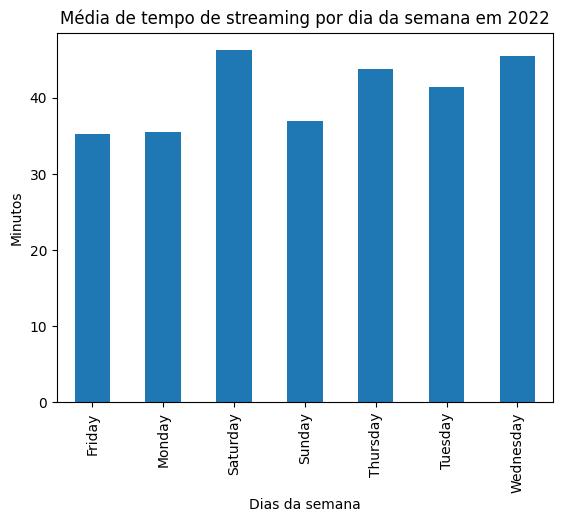

In [ ]:
# Convert 'data/hora' column to datetime
streaming_data['data/hora'] = pd.to_datetime(streaming_data['data/hora'])

# Separar valores pelo ano de 2022
streaming_data_2022 = streaming_data[streaming_data['data/hora'].dt.year == 2022]

# Calcular a média de tempo de streaming por dia da semana
media_tempo = streaming_data_2022.groupby('day_of_week')['tempo_minuto'].sum() / 365

# Criar o gráfico
media_tempo.plot(kind='bar')
plt.ylabel('Minutos')
plt.xlabel('Dias da semana')
plt.title('Média de tempo de streaming por dia da semana em 2022')
plt.show()

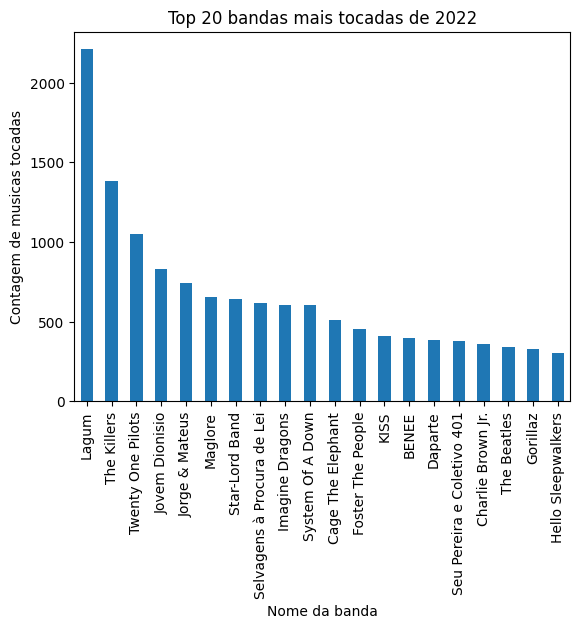

In [ ]:
# Calcular contagem de bandas tocadas
artist_counts_2022 = streaming_data_2022['nome_artista'].value_counts()

# Selecionando os 10 mais tocados
top_artist_2022 = artist_counts_2022[:20]

# Criar o gráfico de barras
top_artist_2022.plot(kind='bar')
plt.ylabel('Contagem de musicas tocadas')
plt.xlabel('Nome da banda')
plt.title("Top 20 bandas mais tocadas de 2022")
plt.show()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_14572\3587551453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streaming_data_2022['hora'] = streaming_data_2022['data/hora'].dt.hour


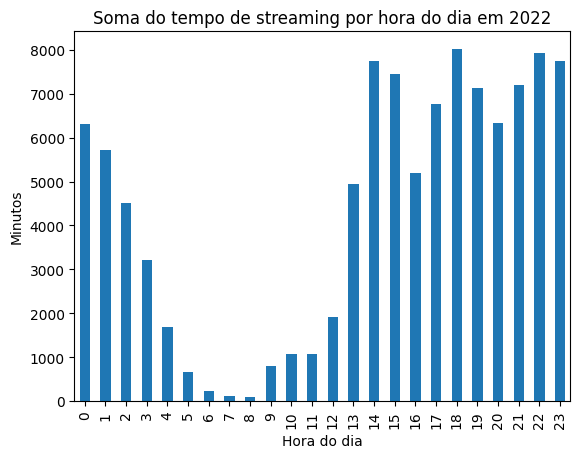

In [ ]:
# Criar nova coluna para a hora do dia
streaming_data_2022['hora'] = streaming_data_2022['data/hora'].dt.hour

# Agrupar por hora do dia soma do tempo de streaming
hora_streaming = streaming_data_2022.groupby('hora')['tempo_minuto'].sum()

# Criar gráfico da soma do tempo de streaming por hora do dia
hora_streaming.plot(kind='bar')
plt.xlabel('Hora do dia')
plt.ylabel('Minutos')
plt.title('Soma do tempo de streaming por hora do dia em 2022')
plt.show()

## Dados de 2023

In [ ]:
# Separa dados de 2023
streaming_data_2023 = streaming_data[streaming_data['data/hora'].dt.year == 2023]

# Contagem das bandas mais tocadas de 2023
artist_counts_2023 = streaming_data_2023['nome_artista'].value_counts()

# Criando top 20
top_artist_2023 = artist_counts_2023[:20]

# Criar gráfico das bandas mais tocadas de 2023
top_artist_2023.plot(kind='bar')
plt.xlabel('Banda')
plt.ylabel('Contagem de Plays')
plt.title('Top 20 bandas mais tocadas de 2023')
plt.show()


NameError: name 'streaming_data' is not defined

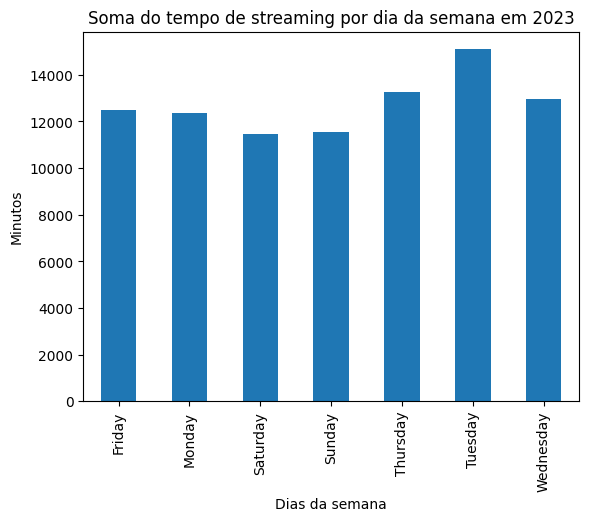

In [ ]:
# Criar dataframe com os dias da semanas
dias_tempo_2023 = streaming_data_2023.groupby('day_of_week')['tempo_minuto'].sum()

# Criar gráfico com a soma do tempo de streaming por dia da semana
dias_tempo_2023.plot(kind='bar')
plt.xlabel('Dias da semana')
plt.ylabel('Minutos')
plt.title('Soma do tempo de streaming por dia da semana em 2023')
plt.show()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_14572\3573864433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streaming_data_2023['hora'] = streaming_data_2023['data/hora'].dt.hour


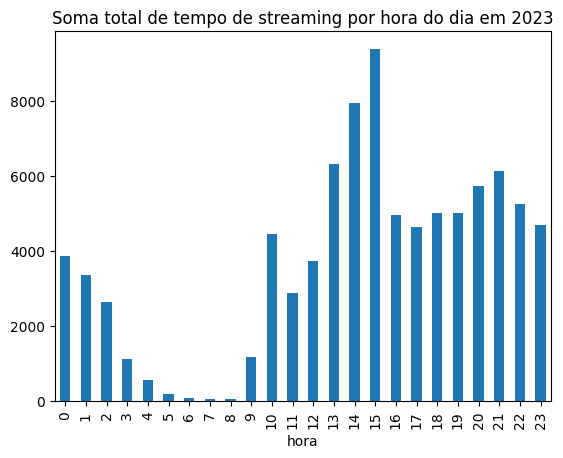

In [ ]:
# Criar coluna com cada hora do dia
streaming_data_2023['hora'] = streaming_data_2023['data/hora'].dt.hour

# Criar dataframe com a soma do total de streaming por hora do dia
hora_streaming_2023 = streaming_data_2023.groupby('hora')['tempo_minuto'].sum()

# Criar gráfico com a soma total de tempo de streaming por hora do dia
hora_streaming_2023.plot(kind='bar')
plt.title('Soma total de tempo de streaming por hora do dia em 2023')
plt.show()